
# Lasso Regression - Beginner Friendly Guide

## Introduction
Lasso Regression (**Least Absolute Shrinkage and Selection Operator**) is a type of **linear regression** that uses **L1 regularization**.

### Key Points:
- L1 regularization adds a penalty equal to the **absolute value of the coefficients**.
- It can shrink some coefficients to **exactly zero**, which helps in **feature selection**.
- Useful when you have many features and want to find the most important ones.


In [15]:

# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing


In [16]:

# Step 2: Load the California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("First 5 rows of the dataset:")
display(X.head())
print("\nTarget variable sample:")
display(y.head())


First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25



Target variable sample:


,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [17]:

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:

# Step 4: Train the Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [19]:

# Step 5: Make predictions
y_pred = lasso.predict(X_test)


In [20]:
# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) # Calculate Mean Squared Error
rmse = np.sqrt(mse) # Calculate Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation:
Mean Absolute Error (MAE): 0.58
Root Mean Squared Error (RMSE): 0.78
R² Score: 0.53


In [21]:

# Step 7: Check Lasso coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso.coef_
})

print("Lasso Coefficients:")
display(coef_df)

# Features with zero coefficients are effectively removed from the model


Lasso Coefficients:


,Feature,Coefficient
0,MedInc,0.392693
1,HouseAge,0.015081
2,AveRooms,-0.000000
3,AveBedrms,0.000000
4,Population,0.000016
5,AveOccup,-0.003149
6,Latitude,-0.114291
7,Longitude,-0.099308


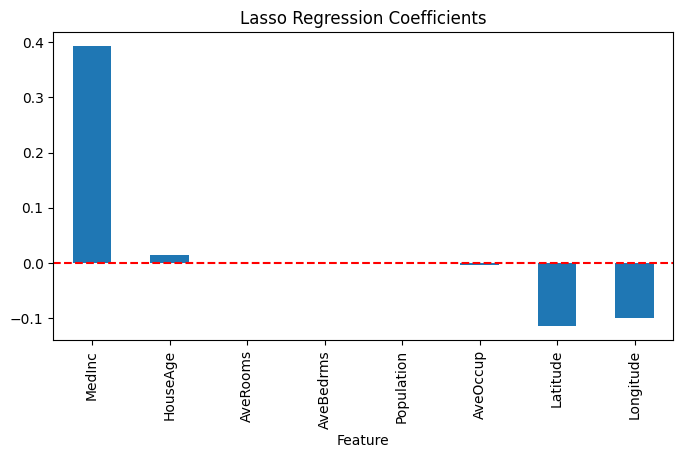

In [26]:

# Step 8: Visualize coefficients
plt.figure(figsize=(8,4))
coef_df.set_index("Feature")["Coefficient"].plot(kind="bar")
plt.axhline(0, color='red', linestyle='--')
plt.title("Lasso Regression Coefficients")
plt.show()

